In [13]:
import pandas as pd

pd.set_option('max_colwidth', 140)

df = pd.read_csv('data/twitter-hate-speech.csv', index_col=0)

In [2]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash ou...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.parsing.preprocessing import preprocess_string

simple = CountVectorizer(min_df=25, max_df=0.75, strip_accents='unicode', analyzer='word')

count = CountVectorizer(min_df=25, max_df=0.75, strip_accents='unicode', analyzer='word',
                        tokenizer=preprocess_string, stop_words='english')

tfidf = TfidfVectorizer(min_df=25, max_df=0.75, strip_accents='unicode', analyzer='word',
                        tokenizer=preprocess_string, stop_words='english')

trigrams = CountVectorizer(min_df=25, max_df=0.75, strip_accents='ascii', analyzer='char',
                           ngram_range=(3, 3))

X_simple = simple.fit_transform(df['tweet'].values)
X_count = count.fit_transform(df['tweet'].values)
X_tfidf = tfidf.fit_transform(df['tweet'].values)
X_trigrams = trigrams.fit_transform(df['tweet'].values)

y = df['class'].values

In [16]:
analyzer = simple.build_analyzer()

df['tweet'].head(n=5).apply(analyzer)

0    [rt, mayasolovely, as, woman, you, shouldn, complain, about, cleaning, up, your, house, amp, as, man, you, should, always, take, the, tr...
1                                                     [rt, mleew17, boy, dats, cold, tyga, dwn, bad, for, cuffin, dat, hoe, in, the, 1st, place]
2                     [rt, urkindofbrand, dawg, rt, 80sbaby4life, you, ever, fuck, bitch, and, she, start, to, cry, you, be, confused, as, shit]
3                                                                                        [rt, c_g_anderson, viva_based, she, look, like, tranny]
4    [rt, shenikaroberts, the, shit, you, hear, about, me, might, be, true, or, it, might, be, faker, than, the, bitch, who, told, it, to, ya...
Name: tweet, dtype: object

In [17]:
analyzer = count.build_analyzer()

df['tweet'].head(n=5).apply(analyzer)

0    [mayasolov, woman, shouldn, complain, clean, hous, amp, man, trash]
1       [mleew, boi, dat, cold, tyga, dwn, bad, cuffin, dat, hoe, place]
2      [urkindofbrand, dawg, sbabylif, fuck, bitch, start, confus, shit]
3                             [anderson, viva, base, look, like, tranni]
4                  [shenikarobert, shit, hear, true, faker, bitch, told]
Name: tweet, dtype: object

In [20]:
analyzer = trigrams.build_analyzer()

df['tweet'].head(n=5).apply(analyzer)

0    [!!!, !! , ! r,  rt, rt , t @,  @m, @ma, may, aya, yas, aso, sol, olo, lov, ove, vel, ely, ly:, y: , : a,  as, as , s a,  a , a w,  wo, ...
1    [!!!, !!!, !!!, !! , ! r,  rt, rt , t @,  @m, @ml, mle, lee, eew, ew1, w17, 17:, 7: , : b,  bo, boy, oy , y d,  da, dat, ats, ts , s c, ...
2    [!!!, !!!, !!!, !!!, !!!, !! , ! r,  rt, rt , t @,  @u, @ur, urk, rki, kin, ind, ndo, dof, ofb, fbr, bra, ran, and, nd , d d,  da, daw, ...
3    [!!!, !!!, !!!, !!!, !!!, !!!, !!!, !! , ! r,  rt, rt , t @,  @c, @c_, c_g, _g_, g_a, _an, and, nde, der, ers, rso, son, on:, n: , : @, ...
4    [!!!, !!!, !!!, !!!, !!!, !!!, !!!, !!!, !!!, !!!, !!!, !! , ! r,  rt, rt , t @,  @s, @sh, she, hen, eni, nik, ika, kar, aro, rob, obe, ...
Name: tweet, dtype: object

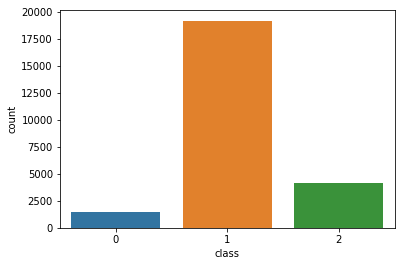

In [19]:
import seaborn as sns

%matplotlib inline

sns.countplot(df['class'])

In [18]:
scores = cross_val_score(MultinomialNB(), X_simple, y, cv=ShuffleSplit(n_splits=10, test_size=0.2))
print("Features %s score: %0.2f (+/- %0.2f)" % ('Simple', scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_count, y, cv=ShuffleSplit(n_splits=10, test_size=0.2))
print("Features %s score: %0.2f (+/- %0.2f)" % ('Count', scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_tfidf, y, cv=ShuffleSplit(n_splits=10, test_size=0.2))
print("Features %s score: %0.2f (+/- %0.2f)" % ('TF/IDF', scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_trigrams, y, cv=ShuffleSplit(n_splits=10, test_size=0.2))
print("Features %s score: %0.2f (+/- %0.2f)" % ('Trigrams', scores.mean(), scores.std()))

Features Count score: 0.88 (+/- 0.00)
Features Count score: 0.89 (+/- 0.00)
Features TF/IDF score: 0.85 (+/- 0.00)
Features Trigrams score: 0.82 (+/- 0.01)


In [9]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

models = [
    LogisticRegression(multi_class='multinomial', solver='newton-cg'),
    MultinomialNB(),
    DecisionTreeClassifier(min_samples_split=50)
]

for model in models:
    scores = cross_val_score(model, X_count, y, cv=ShuffleSplit(n_splits=10, test_size=0.2))
    print("Model %s score: %0.2f (+/- %0.2f)" % (model.__class__.__name__, scores.mean(), scores.std()))

Model LogisticRegression score: 0.91 (+/- 0.00)
Model MultinomialNB score: 0.89 (+/- 0.00)
Model DecisionTreeClassifier score: 0.89 (+/- 0.00)


In [10]:
models = [
    LogisticRegression(multi_class='multinomial', solver='newton-cg', class_weight='balanced'),
    DecisionTreeClassifier(min_samples_split=50, class_weight='balanced')
]

for model in models:
    scores = cross_val_score(model, X_count, y, cv=ShuffleSplit(n_splits=10, test_size=0.2))
    print("Model %s score: %0.2f (+/- %0.2f)" % (model.__class__.__name__, scores.mean(), scores.std()))

Model LogisticRegression score: 0.83 (+/- 0.01)
Model DecisionTreeClassifier score: 0.83 (+/- 0.00)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2)

lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(X_train, y_train)

print(classification_report(y_test, lr.predict(X_test), target_names=('Hate', 'Offensive', 'Neither')))

             precision    recall  f1-score   support

       Hate       0.49      0.22      0.30       300
  Offensive       0.93      0.96      0.95      3835
    Neither       0.84      0.90      0.87       822

avg / total       0.89      0.90      0.89      4957



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2)

lr = MultinomialNB()
lr.fit(X_train, y_train)

print(classification_report(y_test, lr.predict(X_test), target_names=('Hate', 'Offensive', 'Neither')))

             precision    recall  f1-score   support

       Hate       0.48      0.29      0.36       282
  Offensive       0.91      0.95      0.93      3833
    Neither       0.84      0.79      0.81       842

avg / total       0.88      0.89      0.88      4957

